In [18]:
__author__ = "@Tssp"
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from ipywidgets import interactive
from math import pi
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

# $$E_{\pm}(t)=\bar{E}^2 \pm \frac{1}{2}\sqrt{\Delta^2 + 4|W|^2}$$
# for: $$E_1(t) = \frac{1}{2}\alpha t$$
# $$E_2(t) = -\frac{1}{2}\alpha t$$
# $$E_{\pm}(t)=\pm \frac{1}{2}\sqrt{\alpha^2t^2 + 4|W|^2}$$

In [2]:
W = 1
Delta = np.linspace(-10, 10)

In [3]:
def Energies(W, Delta):
    adiabatic = 1/2*np.sqrt(Delta**2 + 4*W**2)
    diabatic = 1/2*Delta
    return adiabatic, -adiabatic, diabatic, -diabatic

In [4]:
E_p, E_m, Ed_p, Ed_m = Energies(W, Delta)

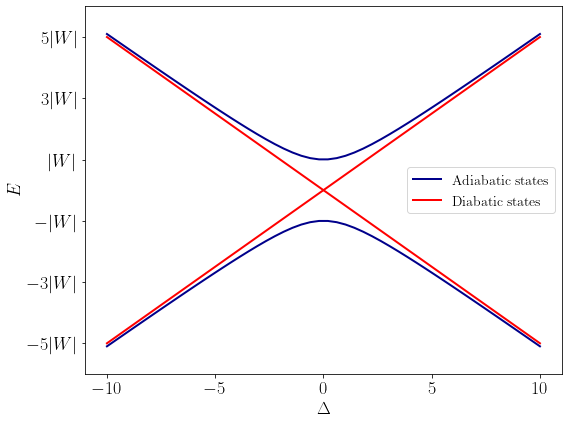

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Delta, E_p, 'darkblue', lw=2, label='Adiabatic states')
ax.plot(Delta, E_m, 'darkblue', lw=2)
ax.plot(Delta, Ed_p, 'red', lw=2, label='Diabatic states')
ax.plot(Delta, Ed_m, 'red', lw=2)
ax.set_xlabel('$\Delta$')
ax.set_ylabel('$E$')
plt.legend(fontsize=14, loc='best')
plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
ax.set_ylim(-6, 6)
#ax.set_xlim(-20, 20)
plt.tight_layout()
#fig.savefig('General_figures/Landau_Zener.png', dpi=200)

In [6]:
def plotting(W=1):
    E_p, E_m, Ed_p, Ed_m = Energies(W, Delta)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(Delta, Ed_p, 'red', lw=2, label='Diabatic states')
    ax.plot(Delta, Ed_m, 'red', lw=2)
    ax.plot(Delta, E_p, 'darkblue', lw=2, label='Adiabatic states')
    ax.plot(Delta, E_m, 'darkblue', lw=2)
    ax.set_xlabel('$\Delta$')
    ax.set_ylabel('$E$')
    plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
    plt.legend(fontsize=14, loc='best')
    ax.set_ylim(-6, 6)
    #ax.set_xlim(-20, 20)

In [7]:
interactive_plot = interactive(plotting, W=(0, 5, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='W', max=5.0, step=0.5), Output()), _dom_classes=('wi…

## Animation

In [8]:
import matplotlib.animation as animation

In [31]:
def init_NA():
    ax.plot(Delta, E_p, 'darkblue', lw=2, label='Adiabatic states')
    ax.plot(Delta, E_m, 'darkblue', lw=2)
    ax.set_xlabel('$\Delta$')
    ax.set_ylabel('$E$')
    ax.text(-0.1, 1.7, r'$\left| \Psi_1 \right>$', fontsize=16, color='darkblue')
    ax.text(-0.1, -1.7, r'$\left| \Psi_2 \right>$', fontsize=16, color='darkblue')
    plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
    ax.set_ylim(-6, 6)
    plt.grid()
    plt.tight_layout()
    return ln,

In [28]:
def update_NA(frame):
    xdata.append(frame)
    E_p, E_m, Ed_p, Ed_m = Energies(W, frame)
    ydata.append(Ed_p)
    ydata2.append(Ed_m)
    ln.set_data(frame, Ed_p)
    ln2.set_data(frame, Ed_m)
    ln3.set_data(xdata, ydata)
    ln4.set_data(xdata, ydata2)
    return ln,

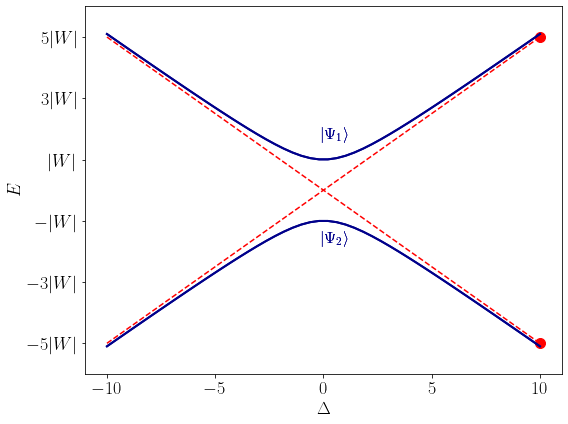

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
xdata, ydata, ydata2 = [], [], []
ln, = plt.plot([], [], '.', color='red', markersize=20)
ln2, = plt.plot([], [], '.', color='red', markersize=20)
ln3, = plt.plot([], [], '--', color='red', markersize=20)
ln4, = plt.plot([], [], '--', color='red', markersize=20)

ani = animation.FuncAnimation(fig, update_NA, frames=np.linspace(-10, 10, 150),
                    init_func=init_NA, blit=True, interval = 20)

ani.save(f'General_figures/NonAdiabatic_Transition.gif', writer='pillow', dpi=200)
plt.show()

In [13]:
def update(frame):
    xdata.append(frame)
    E_p, E_m, Ed_p, Ed_m = Energies(W, frame)
    ydata.append(E_p)
    ydata2.append(E_m)
    ln.set_data(frame, E_p)
    ln2.set_data(frame, E_m)
    return ln,

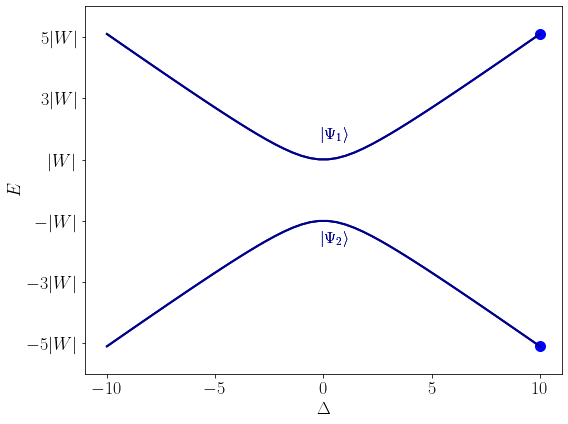

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
xdata, ydata, ydata2 = [], [], []
ln, = plt.plot([], [], '.', color='b', markersize=20)
ln2, = plt.plot([], [], '.', color='b', markersize=20)

ani = animation.FuncAnimation(fig, update, frames=np.linspace(-10, 10, 150),
                    init_func=init, blit=True, interval = 50)

ani.save(f'General_figures/Adiabatic_Transition.gif', writer='pillow', dpi=200)
plt.show()

## With Potential

In [19]:
Ix     = 4993 / 6.436409310e15 # Laser intensity in mW/cm2 X
Iy     = 4993 / 6.436409310e15 # Laser intensity in mW/cm2 Y
Iz     = 50 / 6.436409310e15   # Laser intensity in mW/cm2 Z
wL     = 1000 / 0.0529177249   # Wavelength in nm
hbar   = 1                     # Planck reduced Constant
m      = 12789.3927072494/2    # Li mass in a.u
alpha  = 200                   # Polarization a.u
k      = 2*pi/wL
Vx     = alpha * Ix
Vy     = alpha * Iy
Vz     = alpha * Iz
x      = np.linspace(-20000, 20000, 1000)
y      = np.linspace(-20000, 20000, 1000)
def V(x, k, Vo, m):
    return Vo*(k*x)**2 - 1/3*Vo*(k*x)**4 + 2/45*Vo*(k*x)**6

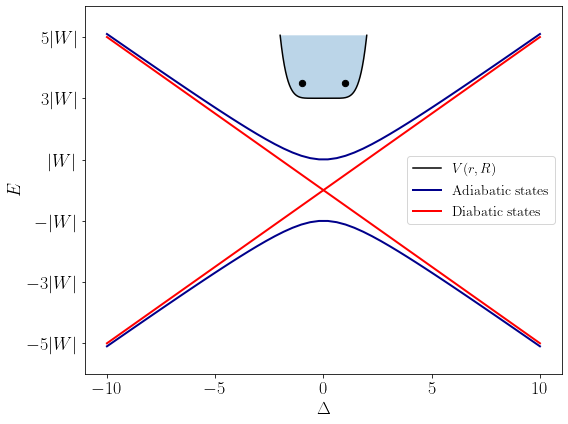

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(0.0001*x, 3+0.0003*V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k), 'k', label='$V(r, R)$')
ax.fill_between(0.0001*x, 3+0.0003*max(V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k)), 3+0.0003*V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k), alpha=0.3)
ax.scatter(-1, 3.5, 40, c='k')
ax.scatter(1, 3.5, 40, c='k')
ax.plot(Delta, E_p, 'darkblue', lw=2, label='Adiabatic states')
ax.plot(Delta, E_m, 'darkblue', lw=2)
ax.plot(Delta, Ed_p, 'red', lw=2, label='Diabatic states')
ax.plot(Delta, Ed_m, 'red', lw=2)
ax.set_xlabel('$\Delta$')
ax.set_ylabel('$E$')
plt.legend(fontsize=14, loc='best')
plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
ax.set_ylim(-6, 6)
#ax.set_xlim(-20, 20)
plt.tight_layout()

In [236]:
def init_NA_pot():
    # upper pot
    ax.plot(0.0001*x, 3+0.0003*V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k), 'k', label='$V(r, R)$')
    ax.fill_between(0.0001*x, 3+0.0003*max(V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k)), 3+0.0003*V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k), alpha=0.3, color='#1f77b4')
    # lower pot
    ax.plot(0.0001*x, -4.5+0.0003*V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k), 'k', label='$V(r, R)$')
    ax.fill_between(0.0001*x, -4.5+0.0003*max(V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k)), -4.5+0.0003*V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k), alpha=0.3, color='#e377c2')
    # Levels
    ax.plot(Delta, E_p, '#1f77b4', lw=2, label='Adiabatic states')
    ax.plot(Delta, E_m, '#e377c2', lw=2)
    ax.set_xlabel('$\Delta$')
    ax.set_ylabel('$E$')
    ax.text(-0.1, 1.7, r'$\left| \Psi_1 \right>$', fontsize=16, color='#1f77b4')
    ax.text(-0.1, -1.7, r'$\left| \Psi_2 \right>$', fontsize=16, color='#e377c2')
    plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
    ax.set_ylim(-6, 6)
    plt.grid()
    plt.tight_layout()
    return ln,

In [237]:
def update_NA_pot(frame):
    xdata.append(frame)
    E_p, E_m, Ed_p, Ed_m = Energies(W, frame)
    ydata.append(Ed_p)
    ydata2.append(Ed_m)
    ln.set_data(frame, Ed_m)
    ln2.set_data(xdata, ydata)
    ln3.set_data(frame, Ed_p)
    ln4.set_data(xdata, ydata2)
    ln5.set_data(-0.3+frame*0.03, 3.5)
    ln6.set_data(0.3-frame*0.03, 3.5)
    ln7.set_data(-0.3+(frame+20)*0.03, -3.9)
    ln8.set_data(0.3-(frame+20)*0.03, -3.9)
    return ln,

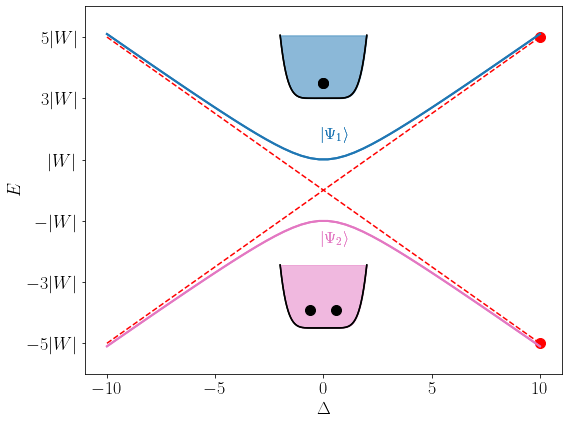

In [238]:
fig, ax = plt.subplots(figsize=(8,6))
xdata, ydata, ydata2 = [], [], []
ln, = plt.plot([], [], '.', color='red', markersize=20)
ln2, = plt.plot([], [], '--', color='red', markersize=20)
ln3, = plt.plot([], [], '.', color='red', markersize=20)
ln4, = plt.plot([], [], '--', color='red', markersize=20)
ln5, = plt.plot([], [], '.', color='k', markersize=20)
ln6, = plt.plot([], [], '.', color='k', markersize=20)
ln7, = plt.plot([], [], '.', color='k', markersize=20)
ln8, = plt.plot([], [], '.', color='k', markersize=20)

ani = animation.FuncAnimation(fig, update_NA_pot, frames=np.linspace(-10, 10, 150),
                    init_func=init_NA_pot, blit=True, interval = 20)

ani.save(f'General_figures/NonAdiabatic_Transition_pot.gif', writer='pillow', dpi=200)
plt.show()